<a href="https://colab.research.google.com/github/j-winfield/fastaidl/blob/master/Handwrittendigits%26otherdataformats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [0]:
bs=64

In [7]:
path =untar_data(URLs.MNIST_SAMPLE);path


PosixPath('/root/.fastai/data/mnist_sample')

In [35]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/models')]

In [0]:

tfms=get_transforms(do_flip=False)
data=ImageDataBunch.from_folder(path,ds_tfms=tfms,size=36)
                                 

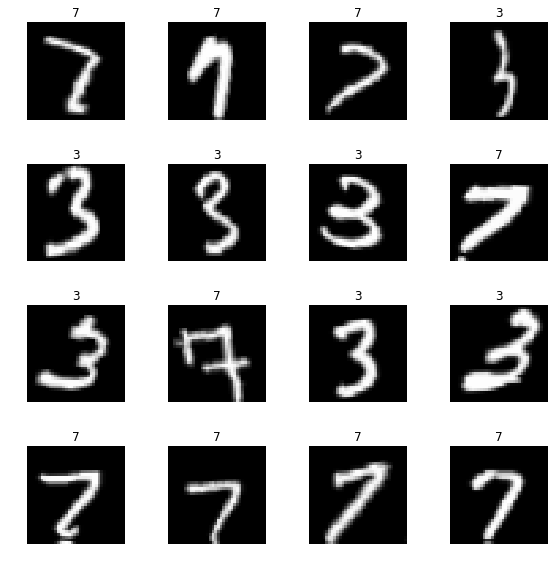

In [9]:
data.show_batch(figsize=(8,8),rows=4)

In [10]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 29040674.80it/s]


In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.129119,0.037879,0.013248,00:31
1,0.060324,0.026853,0.009814,00:29
2,0.048198,0.016700,0.005397,00:29
3,0.038510,0.015415,0.004907,00:29


In [0]:
learn.save('stage1')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)


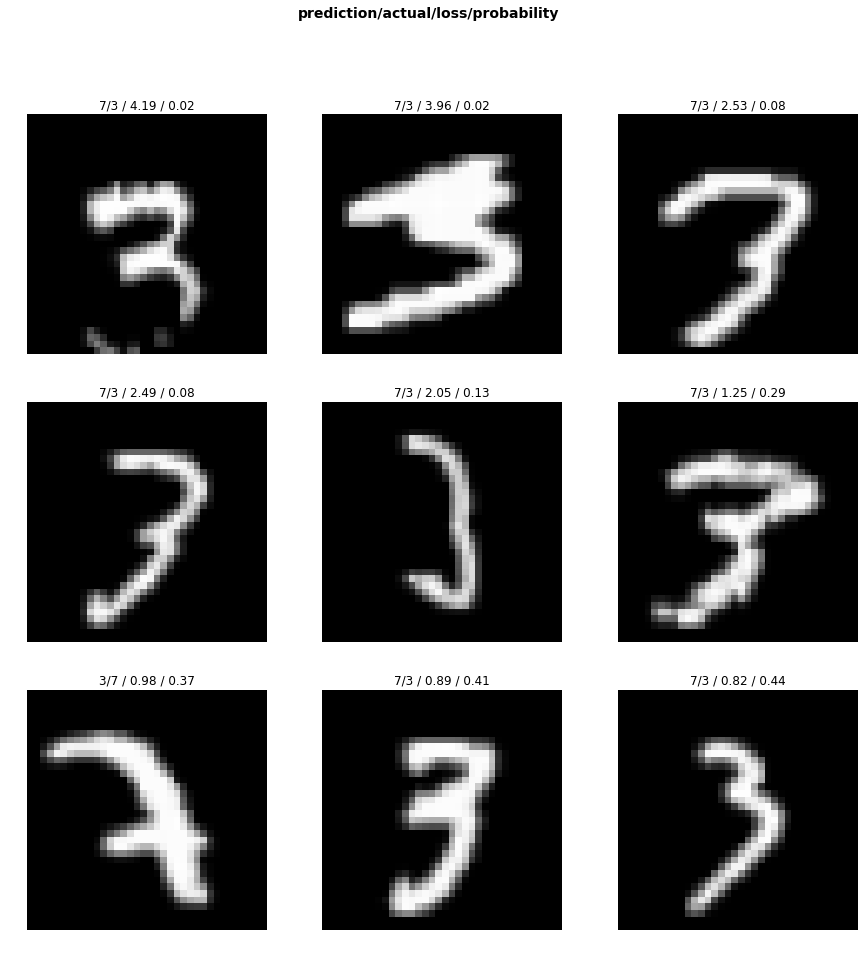

In [15]:
interp.plot_top_losses(9,figsize=(15,15))

In [0]:
 learn.unfreeze()

In [17]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.032186,0.002582,0.000491,00:32
1,0.006325,0.000886,0.000000,00:32


In [0]:
learn.save('stage2')

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


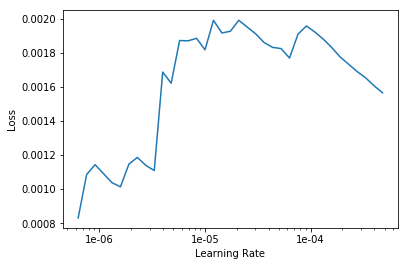

In [20]:
learn.recorder .plot()

In [0]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(2,max_lr=slice(8e-5,1e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.004897,0.001808,0.000491,00:32
1,0.002202,0.000338,0.000000,00:32


In [0]:
learn.save('stage2')

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


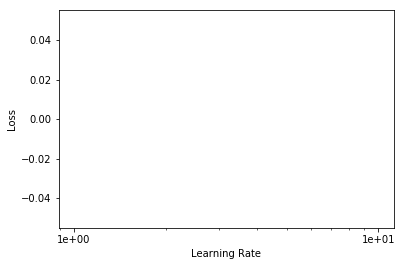

In [25]:
learn.recorder.plot()

In [0]:
learn.save('stage2')

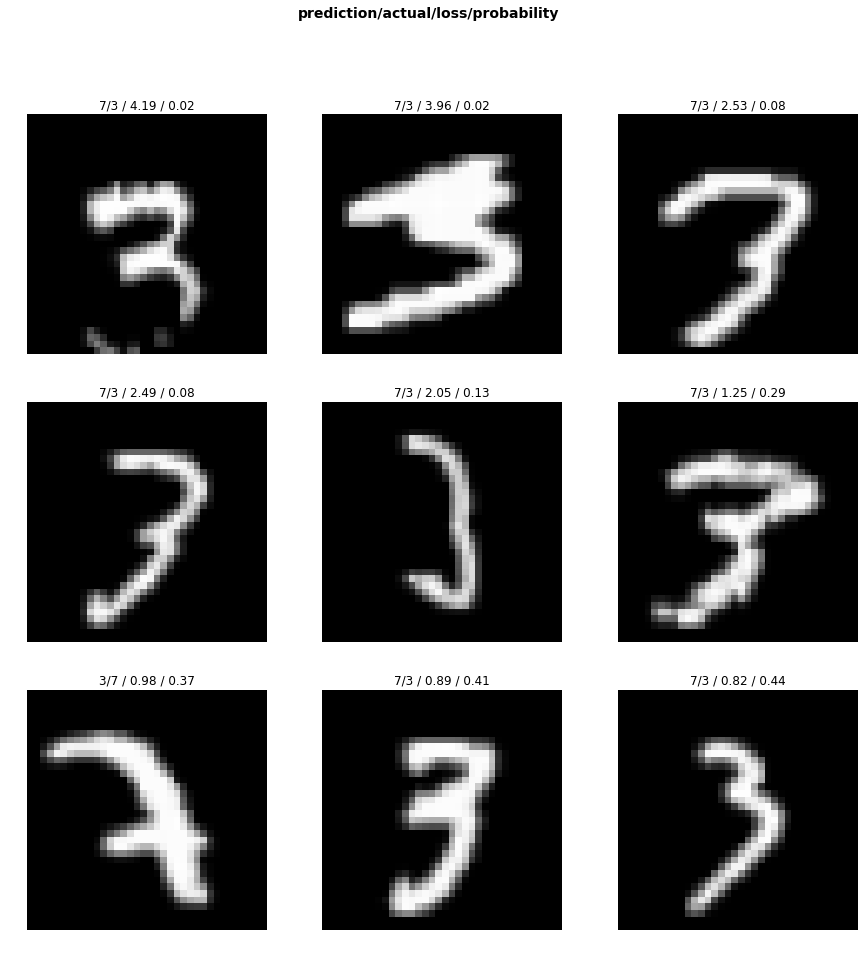

In [27]:
interp.plot_top_losses(9,figsize=(15,15))

In [0]:
df=pd.read_csv(path/'labels.csv')

In [38]:
df

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0
5,train/3/41391.png,0
6,train/3/11910.png,0
7,train/3/52435.png,0
8,train/3/21660.png,0
9,train/3/1226.png,0


In [0]:
data=ImageDataBunch.from_csv(path,ds_tfms=tfms,size=28)

In [41]:
data.classes

[0, 1]

In [42]:
fn_paths=[path/name for name in df['name']];fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [0]:
pat=r"/(\d)/\d+\.png"

In [44]:
doc(ImageDataBunch.from_name_re)

In [0]:
data=ImageDataBunch.from_name_re(path,fn_paths,pat=pat,ds_tfms=tfms,size=24)

In [47]:
data.classes

['3', '7']

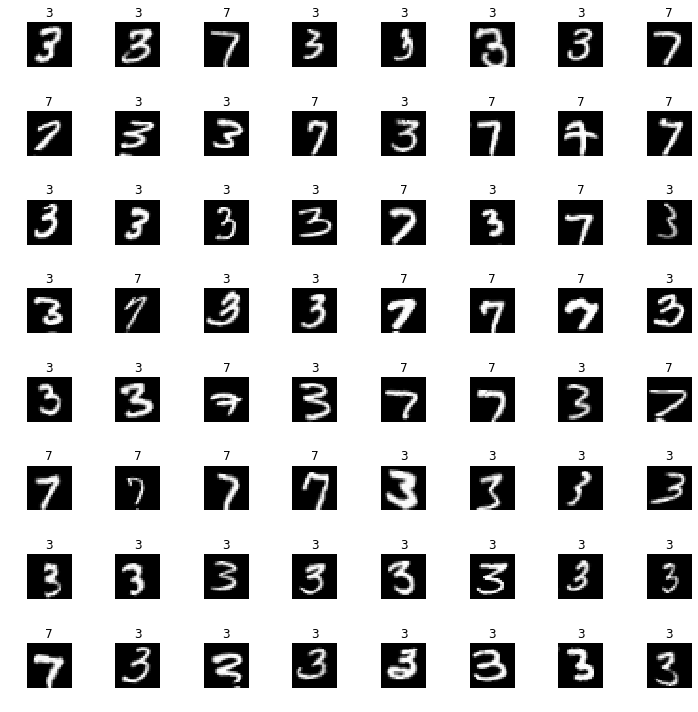

In [48]:
data.show_batch(9,figsize=(10,10))

In [0]:
data=ImageDataBunch.from_name_func()